# Implementing special-diet oriented strategy on Tripadvisor website

**Group B8**
- Yiwen Fan
- Anusha Ronaki
- Nan Dong
- Xin (Ashley) Su
- Xueyi (Sherry) Cao


## Table of Contents

1. Project Definition
2. Data Preprocessing
3. Exploratory Data Analysis (EDA)
4. Summary
5. Reference

## Report Summary

After exploring the Tripadvisor dataset, we have analyzed a critical metric: the special diets, which include vegan, vegetarian, and gluten-free. Upon further analysis, we developed a business intelligence strategy for the Tripadvisor website to implement certain features on its interface for better customer engagement and user experience. 

<a id="1"></a>
# 1.Project Definition

## 1.1 Introduction & Motivation


A growing number of people around the globe are suffering from diet-related diseases such as cardiovascular disease or obesity. Increased awareness of the health benefits of plant-based products has increased the consumer base of the special-diet industry. 

The increased emphasis on health problems has also encouraged people from various backgrounds and cultures to go vegetarian, vegan, or gluten-free, and these diets are fast becoming mainstream.

Besides, in our quest to provide food for 8 billion people on our planet, we must protect our water supply, air quality, and life's interconnectedness. In addition to safeguarding our health, choosing a vegetarian and vegan diet helps the environment, which is why this topic interests us.

## 1.2 Project Objective

Our Exploratory Data Analysis (EDA) mainly focuses on "special-diet" information, including vegetarian, vegan, and gluten-free options listed on each restaurant's profile page.

Through our analysis, we aim to understand the differences between special-diet and non-special-diet restaurants listed on Tripadvisor.

Our goal in analyzing the Tripadvisor European restaurants dataset is to apply special-diet-related strategies on Tripadvisor's webpage interface to cater to customers' healthy dietary lifestyles and enhance the customer experience when using Tripadvisor.

## 1.3 Data Source



This dataset contains information on over 1 million restaurants in central European countries with attributes such as average rating, number of reviews, open hours, cuisine types, awards, etc., listed on Tripadvisor.

The data was crawled from the Tripadvisor website (https://www.tripadvisor.com ) in May 2021 using the Python script (example: https://www.tripadvisor.com/Restaurant_Review-g187147-d20208797-Reviews-Da_Giuseppe-Paris_Ile_de_France.html).

(Kaggle link:
https://www.kaggle.com/datasets/stefanoleone992/tripadvisor-european-restaurants)

<a id="2"></a>
# 2.Data Preprocessing

## 2.1 Summary of Key Variables

### 2.1.1 General Information Related

Column | Description | Dtype | Null| Numeric or Categorical | Transformation | 
-------------|-------------|-------|-----|------------------------|---------------|
1. `restaurant_link` | Unqiue link of the restaurant| obejct | No | -- | No
2. `country`| Country displayed on Tripadvisor| obejct | No | Categorical | No
3. `latitude`| Latitude coordinate restaurant located| float64 | Yes | -- | No
4. `longitude`| Longitude coordinate restaurant located| float64 | Yes | -- | No
5. `claimed` | Restaurant business claimed on Tripadvisor<br> If a business is claimed, the business owner is able to manage the listing, respond to the reviews and track business performance on Tripadvisor | obejct | Yes | Categorical | No
6. `awards`| Name of awards listed on Tripadvisor| obejct | Yes | Categorical | <font color ='red'>Yes</font><br>Calculate the number of awards of each restaurant, and create a new numeric variable
7. `top_tags` | Top tag names of each restaurant listed on Tripadvisor | obejct | Yes | Categorical | <font color ='red'>Yes</font><br>Calculate the number of awards of each restaurant, and create a new numeric variable
8. `price_level`| Level of prices in current currency | obejct | Yes | Categorical | <font color ='red'>Yes</font><br> Change price value '€', '€€-€€€', and '€€€€' into three categories: cheap, medium, expensive
9. `meals`|Type of meals listed on Tripadvisor| obejct | Yes | Categorical | <font color ='red'>Yes</font><br> Calculate the number of type of meals of each restaurant, and create a new numeric variable
10. `avg_rating`| Average restaurant rating on Tripadvisor | float64 | Yes | Categorical | No
11. `total_reviews_count`| Total number of reviews listed on Tripadvisor | float64 | Yes | Numeric | No

### 2.1.2 Sepcial Diets Related

Column | Description | Dtype | Null| Numeric or Categorical | Transformation | 
-------------|-------------|-------|-----|------------------------|---------------|
1. `vegetarian_friendly`| Is the restaurant vegetarian friendly? <br> Y - Yes; N - No | obejct | No | Categorical | No
2. `vegan_options`| Does the restaurant offer vegan options?<br> Y - Yes; N - No | obejct | No | Categorical | No
3. `gluten_free`| Does the restaurant gluten-free options?<br> Y - Yes; N - No | obejct | No | Categorical | No

## 2.2 Importing Libraries

In [ ]:
import pandas as pd
import numpy as np

# Import libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Import library for missingness
import missingno as msno

%matplotlib inline
sns.set(color_codes=True)

## 2.3 Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
data_folder = '/content/drive/Shareddrives/ba780 group project/data/'
original = pd.read_csv(data_folder + 'tripadvisor_european_restaurants.csv',index_col = False)

Mounted at /content/drive


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
print("The original data contains {A} rows and {B} columns.".format(A=original.shape[0],B=original.shape[1]))

The original data contains 1083397 rows and 42 columns.


In [ ]:
print(original.info())
original.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083397 entries, 0 to 1083396
Data columns (total 42 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   restaurant_link                    1083397 non-null  object 
 1   restaurant_name                    1083397 non-null  object 
 2   original_location                  1083397 non-null  object 
 3   country                            1083397 non-null  object 
 4   region                             1033074 non-null  object 
 5   province                           742765 non-null   object 
 6   city                               682712 non-null   object 
 7   address                            1083397 non-null  object 
 8   latitude                           1067607 non-null  float64
 9   longitude                          1067607 non-null  float64
 10  claimed                            1081555 non-null  object 
 11  awards                  

,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,...,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
0,g10001637-d10002227,Le 147,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"10 Maison Neuve, 87510 Saint-Jouvent France",45.961674,1.169131,...,2.0,0.0,0.0,0.0,0.0,4.0,4.5,4.0,NaN,NaN
1,g10001637-d14975787,Le Saint Jouvent,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"16 Place de l Eglise, 87510 Saint-Jouvent France",45.957040,1.205480,...,2.0,2.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,g10002858-d4586832,Au Bout du Pont,"[""Europe"", ""France"", ""Centre-Val de Loire"", ""B...",France,Centre-Val de Loire,Berry,Rivarennes,"2 rue des Dames, 36800 Rivarennes France",46.635895,1.386133,...,3.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


## 2.4 Dropping Irrelevant Columns

We drop variables that contain duplicate or irrelevant information. Here are some reasons for dropping these columns:
- `restaurant_name`<br>
In this dataset, since every restaurant has a different URL for the Tripadvisor webpage, we use the `restaurant_link` as the identifier for each restaurant, and drop the `restaurant_name`. Besides, `restaurant_name` cannot be used as an identifier to distinguish each unique restaurant because some may use the same name.
- `original_location`, `province`, `city`<br>
`original_location` contains information including country, region, province, etc. However, our analysis focuses on the country level and does not require more breakdown variables. In addition, `province` and `city` have a large proportion of null values, so we do not use these as the main parameters for this analysis.
- `original_open_hours`, `open_days_per_week`, `open_hours_per_week`, `working_shifts_per_week`<br>
These variables have a large percentage of null values and contain content irrelevant to our analysis in this case. Thus they are removed.
- `excellent`, `very_good`, `average`, `poor`<br>
The information for all these four variables is contained in `avg_rating`, so we used the more representative `avg_rating` in our analysis and removed these four.

In [ ]:
df=original.drop(columns=["restaurant_name","original_location",'region',"province","city","address","popularity_detailed","popularity_generic",'features',"special_diets","price_range","original_open_hours",'open_hours_per_week','open_days_per_week',"working_shifts_per_week","default_language","reviews_count_in_default_language","excellent","very_good","average","poor","food","service","value","atmosphere","terrible","keywords"])
print(df.shape)
df.head(3)

(1083397, 15)


,restaurant_link,country,latitude,longitude,claimed,awards,top_tags,price_level,meals,cuisines,vegetarian_friendly,vegan_options,gluten_free,avg_rating,total_reviews_count
0,g10001637-d10002227,France,45.961674,1.169131,Claimed,NaN,"Cheap Eats, French",€,"Lunch, Dinner",French,N,N,N,4.0,36.0
1,g10001637-d14975787,France,45.957040,1.205480,Unclaimed,NaN,Cheap Eats,€,NaN,NaN,N,N,N,4.0,5.0
2,g10002858-d4586832,France,46.635895,1.386133,Claimed,NaN,"Cheap Eats, French, European",€,"Dinner, Lunch, Drinks","French, European",N,N,N,5.0,13.0


## 2.5 Checking Missingness

In [ ]:
df.isna().sum()

restaurant_link             0
country                     0
latitude                15790
longitude               15790
claimed                  1842
awards                 820264
top_tags               110634
price_level            277205
meals                  448050
cuisines               169103
vegetarian_friendly         0
vegan_options               0
gluten_free                 0
avg_rating              96636
total_reviews_count     52235
dtype: int64

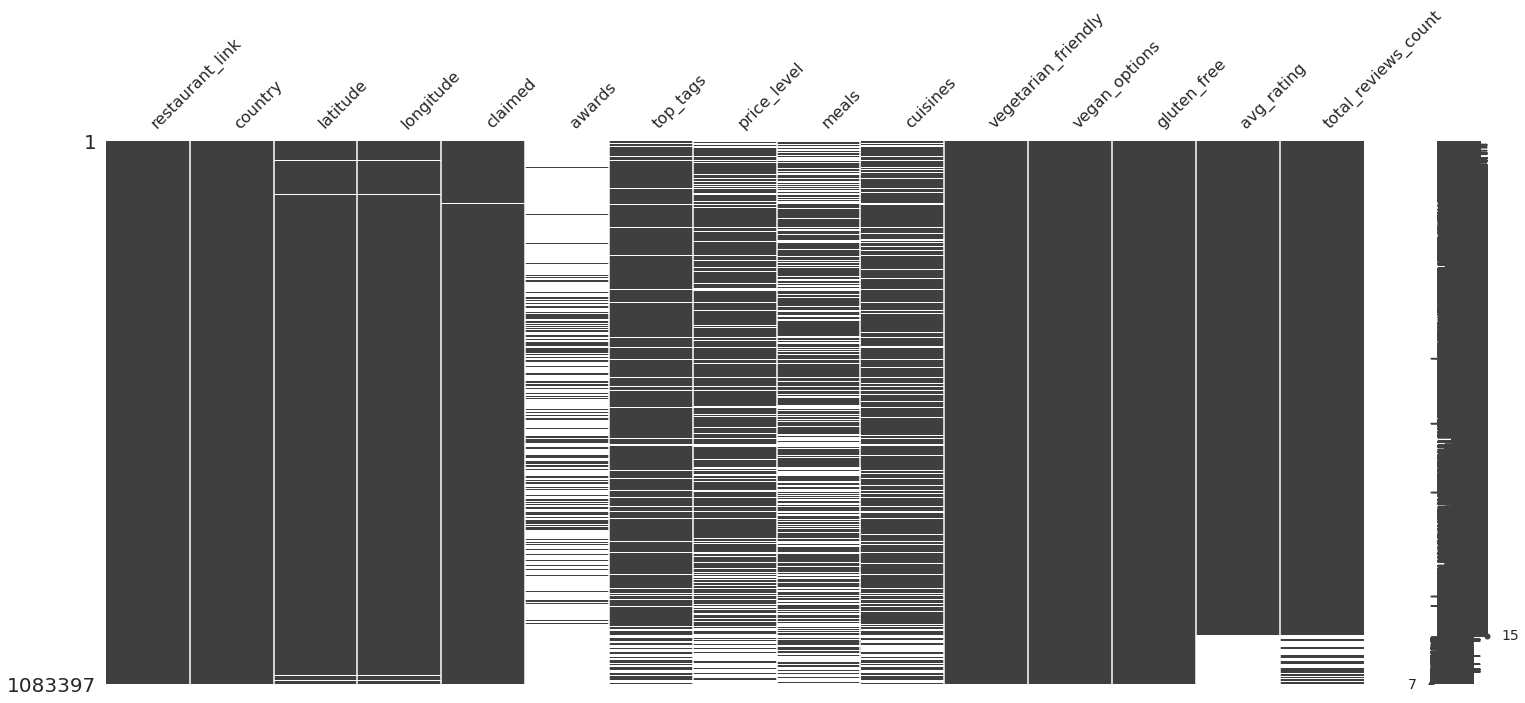

In [ ]:
# Visualize missingness by sorting "avg_rating"
sorted_df = df.sort_values(by = 'avg_rating')
msno.matrix(sorted_df)
plt.show()

- `avg_rating` is one of our key variables. To avoid our analysis being skewed by restaurants that don't have any rating because of closures or new openings, we decided to drop the rows where avg_rating is missing.
- Similarly, although there is only a small percentage of null values in the `claimed` column since the restaurants listed on Tripadvisor should be either claimed or unclaimed, we drop the rows with null values in `claimed` to exclude the newly registered or closed restaurants.

In [ ]:
# Drop rows where key variable "avg_rating" is missing
df = df.dropna(subset=['avg_rating'])

# Drop rows where "claimed" is missing
df = df.dropna(subset=['claimed'])

## 2.6 Data Transformation 

### 2.6.1 `awards` --> `number_of_awards`

The `awards` column will be rendered null if a restaurant has not won any awards yet.  We calculate the number of awards to create a new variable `number_of_awards` and replace all the nulls with zeros.

In [ ]:
# Calculate the number of awards and create a new variable
df["number_of_awards"]=df["awards"].str.split(",").str.len()

# Replace nulls with 0
df["number_of_awards"]=df["number_of_awards"].fillna(0).astype(int)

In [ ]:
df["number_of_awards"].unique()

array([ 0,  2,  5,  7,  1,  6,  3,  4,  9,  8, 10, 11, 12])

### 2.6.2 `price_level` --> `price_level_new`



First, for the nulls in `price_level`, we fill them as "Not Listed" since the reason for the missing values is that the price level is not listed on the webpage.<br>
Then, we replace `price_level` of currency symbols "€", "€€-€€€" and "€€€€" with text labels "Cheap", "Medium" and "Expensive" for readability and create a new variable `price_level_new`.

In [ ]:
df["price_level"]=df["price_level"].fillna("Not Listed")

In [ ]:
# Convert price level '€', '€€-€€€', and '€€€€' into three categories: cheap, medium, expensive.
mapping = {'€': 'Cheap', '€€-€€€': 'Medium', '€€€€': 'Expensive'}

df['price_level_new'] = df['price_level'].replace(mapping)

In [ ]:
df.price_level_new.unique()

array(['Cheap', 'Medium', 'Not Listed', 'Expensive'], dtype=object)

### 2.6.3 `top_tags` --> `number_of_top_tags`

For `top_tags`, we calculate the number of tags listed on Tripadvisor to create a new variable `number_of_top_tags` and replace all the nulls with zeros.

In [ ]:
# Calculate the number of tags and create a new variable
df["number_of_top_tags"]=df["top_tags"].str.split(",").str.len()

# Replace nulls with 0
df["number_of_top_tags"]=df["number_of_top_tags"].fillna(0).astype(int)

In [ ]:
df["number_of_top_tags"].unique()

array([2, 1, 3, 4, 0])

### 2.6.4 `meals` --> `number_of_meals`

For `meals`, we calculate the number of different types of meals a restaurant offers. We create a new variable `number_of_meals` and replace all the nulls with zeros.

In [ ]:
# Calculate the number of tags and create a new variable
df["number_of_meals"]=df["meals"].str.split(",").str.len()

# Replace nulls with 0
df["number_of_meals"]=df["number_of_meals"].fillna(0).astype(int)

In [ ]:
df["number_of_meals"].unique()

array([2, 0, 3, 5, 1, 4, 6])

## 2.7 Check Cleaned Data

In [ ]:
print("The cleaned data contains {A} rows and {B} columns.".format(A=df.shape[0],B=df.shape[1]))

The cleaned data contains 985117 rows and 19 columns.


In [ ]:
print(df.info())
df.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985117 entries, 0 to 1083396
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   restaurant_link      985117 non-null  object 
 1   country              985117 non-null  object 
 2   latitude             972827 non-null  float64
 3   longitude            972827 non-null  float64
 4   claimed              985117 non-null  object 
 5   awards               262624 non-null  object 
 6   top_tags             911392 non-null  object 
 7   price_level          985117 non-null  object 
 8   meals                603468 non-null  object 
 9   cuisines             856442 non-null  object 
 10  vegetarian_friendly  985117 non-null  object 
 11  vegan_options        985117 non-null  object 
 12  gluten_free          985117 non-null  object 
 13  avg_rating           985117 non-null  float64
 14  total_reviews_count  985117 non-null  float64
 15  number_of_awards

,restaurant_link,country,latitude,longitude,claimed,awards,top_tags,price_level,meals,cuisines,vegetarian_friendly,vegan_options,gluten_free,avg_rating,total_reviews_count,number_of_awards,price_level_new,number_of_top_tags,number_of_meals
0,g10001637-d10002227,France,45.961674,1.169131,Claimed,NaN,"Cheap Eats, French",€,"Lunch, Dinner",French,N,N,N,4.0,36.0,0,Cheap,2,2
1,g10001637-d14975787,France,45.957040,1.205480,Unclaimed,NaN,Cheap Eats,€,NaN,NaN,N,N,N,4.0,5.0,0,Cheap,1,0
2,g10002858-d4586832,France,46.635895,1.386133,Claimed,NaN,"Cheap Eats, French, European",€,"Dinner, Lunch, Drinks","French, European",N,N,N,5.0,13.0,0,Cheap,3,3


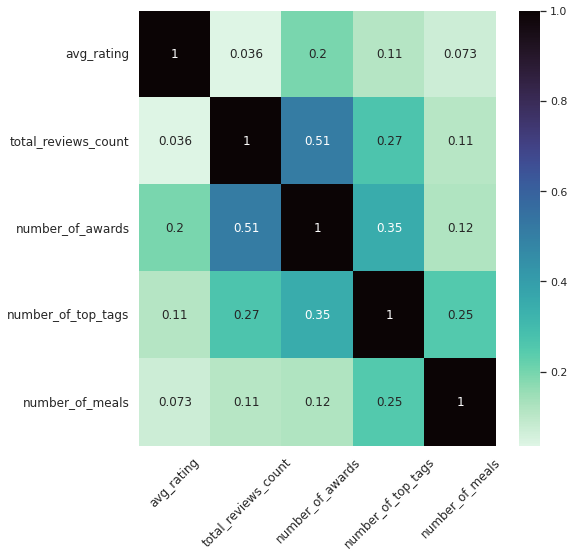

In [ ]:
# Correlation between numeric variables
num_attr=["avg_rating","total_reviews_count","number_of_awards","number_of_top_tags","number_of_meals"]
corr = df[num_attr].corr()
# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(8, 8))
# Configure a custom diverging colormap
cmap = sns.color_palette("mako_r", as_cmap=True)
# Draw the heatmap
ax = sns.heatmap(corr, annot=True, cmap=cmap)
ax.set_xticklabels(num_attr, rotation=45, fontsize = 12)
ax.set_yticklabels(num_attr, rotation=0, fontsize = 12);

# 3.Exploratory Data Analysis (EDA) 

We split data into two subsets `special_diets` and `non_special_diets` for Exploratory Data Analysis (EDA). <br>
For `special_diets`, we define restaurants offering at least one special-diet option (Vegan / Vegetarian / Gluten Free) as special-diet restaurants and restaurants that offer no special diet option as non-special-diet restaurants.

In [ ]:
special_diets= df[(df['vegetarian_friendly']=="Y")|(df['vegan_options']=="Y")|(df['gluten_free']=="Y")]
non_special_diets=df[(df['vegetarian_friendly']=="N")&(df['vegan_options']=="N")&(df['gluten_free']=="N")]

We create a new categorical column `special_diets` to identify whether a restaurant offers special-diet options.

In [ ]:
df["special_diets"]= 'Non-special-diet'
df.loc[(df['vegetarian_friendly']=="Y")|(df['vegan_options']=="Y")|(df['gluten_free']=="Y"), "special_diets"] = 'Special-diet'

#Print the modified version 
df.head(3)

,restaurant_link,country,latitude,longitude,claimed,awards,top_tags,price_level,meals,cuisines,vegetarian_friendly,vegan_options,gluten_free,avg_rating,total_reviews_count,number_of_awards,price_level_new,number_of_top_tags,number_of_meals,special_diets
0,g10001637-d10002227,France,45.961674,1.169131,Claimed,NaN,"Cheap Eats, French",€,"Lunch, Dinner",French,N,N,N,4.0,36.0,0,Cheap,2,2,Non-special-diet
1,g10001637-d14975787,France,45.957040,1.205480,Unclaimed,NaN,Cheap Eats,€,NaN,NaN,N,N,N,4.0,5.0,0,Cheap,1,0,Non-special-diet
2,g10002858-d4586832,France,46.635895,1.386133,Claimed,NaN,"Cheap Eats, French, European",€,"Dinner, Lunch, Drinks","French, European",N,N,N,5.0,13.0,0,Cheap,3,3,Non-special-diet


## 3.1 `Country`

### 3.1.1 How many restaurants in each European country are listed on Tripadvisor?

For restaurants listed on Tripadvisor in Europe, over 21% of restaurants are located in Italy with total number of 207702, followed by France, Spain, England, and Germany. 

In [ ]:
# Group data by country and count number of restaurant in each country, and then create a new dataframe.
by_country = df.groupby(['country']).agg({'restaurant_link': 'nunique'})\
    .rename(columns={'restaurant_link': 'num_restaurants'}).reset_index().sort_values("num_restaurants", ascending=False)

# Create a new column to calculate the ratio of restautants in Europe by country.  
by_country['ratio_country'] = (by_country.num_restaurants / by_country.num_restaurants.sum()*100).round(2)

 # Top 10 countries 
by_country.sort_values(by="num_restaurants", ascending=False)[:10]

,country,num_restaurants,ratio_country
13,Italy,207702,21.08
8,France,144313,14.65
20,Spain,142418,14.46
6,England,132793,13.48
9,Germany,101587,10.31
10,Greece,31129,3.16
16,Portugal,29336,2.98
22,The Netherlands,26950,2.74
1,Belgium,21985,2.23
15,Poland,20715,2.10


In [ ]:
# Calculate the sum ratio of top 5 countries
print(str(by_country['ratio_country'][:5].sum()) +"%")

73.98%


According to the pie chart below, the top 5 countries together account for 75% of all European restaurants on Tripadvisor.

In [ ]:
fig = px.pie(by_country, 
             values="num_restaurants", 
             names='country', 
             color_discrete_sequence=px.colors.sequential.haline_r,
             title='Number of Restaurants in Europe Listed on Tripadvisor (by country)', 
             hover_data=['country'], labels={'num_restaurants':'Number of Restaurants'})
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(uniformtext_minsize=14, uniformtext_mode='hide',title_x=0.5, font_size=16, margin = dict(t=50, l=25, r=25, b=25))
fig.show()

A screenshot of the Plotly graph

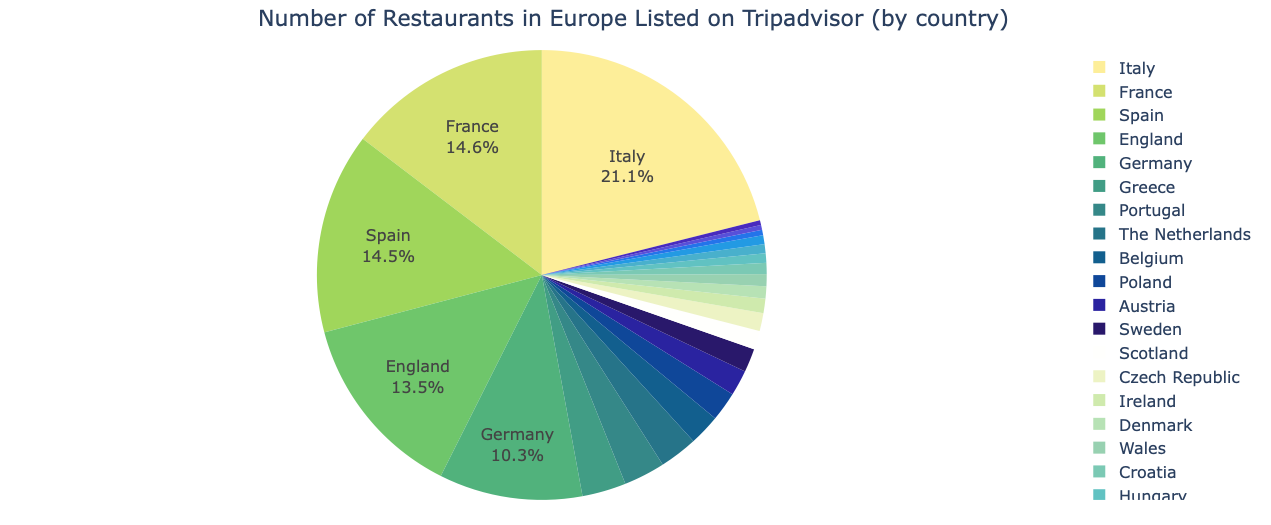

*Based on the above, we propose that Tripadvisor can adjust the order of display on the web page when users are browsing the restaurants on Tripadvisor. For example, the five countries with the highest number of restaurants could be placed at the top of the page when users browse restaurants in European countries.*

### 3.1.2 What is the ratio of special-diet restaurants in each European country?

In terms of numbers, Italy, England, and Spain are the top 3 regions that have the most restaurants offering special-diet options (Vegan / Vegetarian / Gluten Free) in Europe.

In [ ]:
# Group data by country and count number of restaurant in each country, and then create a new dataframe.
sd_by_country = special_diets.groupby(['country']).agg({'restaurant_link': 'nunique'})\
    .rename(columns={'restaurant_link': 'Number of special-diet restaurants'}).reset_index().sort_values("Number of special-diet restaurants", ascending=False)

# Merge sd_by_country with by_country created in 3.1.1 and create a new dataframe.
agg_sd_by_country= sd_by_country.merge(by_country[['country','num_restaurants']], on="country")

#Calclulate the ratio of special-diet restaurants in each country.
agg_sd_by_country['ratio'] = (agg_sd_by_country["Number of special-diet restaurants"] / agg_sd_by_country.num_restaurants*100).round(2)

#Sort by number of special-diet restaurants to get the top 5 countries
agg_sd_by_country.sort_values(by="Number of special-diet restaurants", ascending=False)[:5]

,country,Number of special-diet restaurants,num_restaurants,ratio
0,Italy,80394,207702,38.71
1,England,65233,132793,49.12
2,Spain,41855,142418,29.39
3,Germany,41281,101587,40.64
4,France,26678,144313,18.49


In terms of ratio, among European countries, the United Kingdom (England, Wales, Scotland, and Northern Ireland) has the highest ratio of restaurants offering special-diet options, with ratios ranging from 43% to 50% respectively.

In [ ]:
#Sort by ratio of special-diet restaurants
agg_sd_by_country.sort_values(by="ratio", ascending=False)

,country,Number of special-diet restaurants,num_restaurants,ratio
12,Wales,4258,8530,49.92
9,Scotland,6618,13315,49.70
1,England,65233,132793,49.12
11,Ireland,4852,10213,47.51
5,The Netherlands,12437,26950,46.15
19,Northern Ireland,1440,3370,42.73
15,Croatia,3235,7865,41.13
7,Austria,7416,18142,40.88
3,Germany,41281,101587,40.64
0,Italy,80394,207702,38.71


In [ ]:
fig = px.treemap(agg_sd_by_country, 
                 path=[px.Constant("Europe"), 'country'],
                 values= "Number of special-diet restaurants", 
                 color="ratio", 
                 color_continuous_scale='aggrnyl', 
                 width=1000, height=600, 
                 labels={'ratio': 'Ratio of special-diet restaurants (%)'})
fig.update_layout(
        height=600,
        title=dict(
        text='Number and Ratio of Special-diet Restaurants in Europe',
        font=dict(
            size=20
        )), title_x=0.5, margin = dict(t=50, l=25, r=25, b=25)
)
fig.update_traces(textinfo="label+value")

fig.show()

A screenshot of the Plotly graph

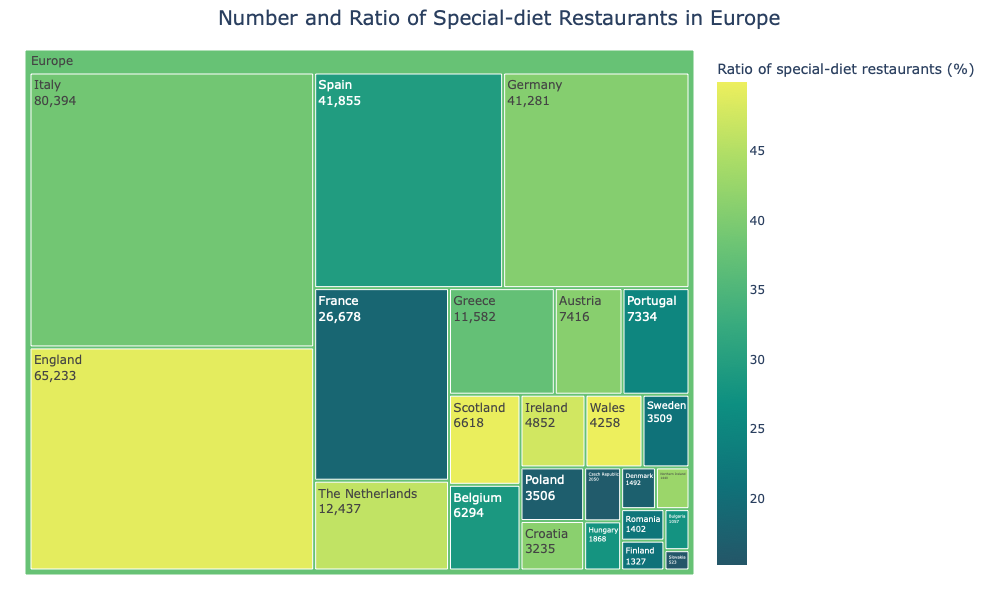

*Based on the above, Tripadvisor can start by promoting restaurants that offer special diets in the countries with the largest restaurant base or the highest percentage of restaurants. For example, add a "Vegan" or "Gluten-free" logo to the top of restaurant profile pages in these countries.*

### 3.1.3 What are the top 10 European countries with restaurants offering special-diet options?

Italy, England, and Spain are the top 3 regions that have the most restaurants offering special-diet options (Vegan / Vegetarian / Gluten Free) in Europe.
Even in the top 10 countries, there are big gaps between the top 3 countries and 8-10th countries.

In [ ]:
top_10_sd_by_country = agg_sd_by_country.sort_values(by="Number of special-diet restaurants", ascending=False)[:10]

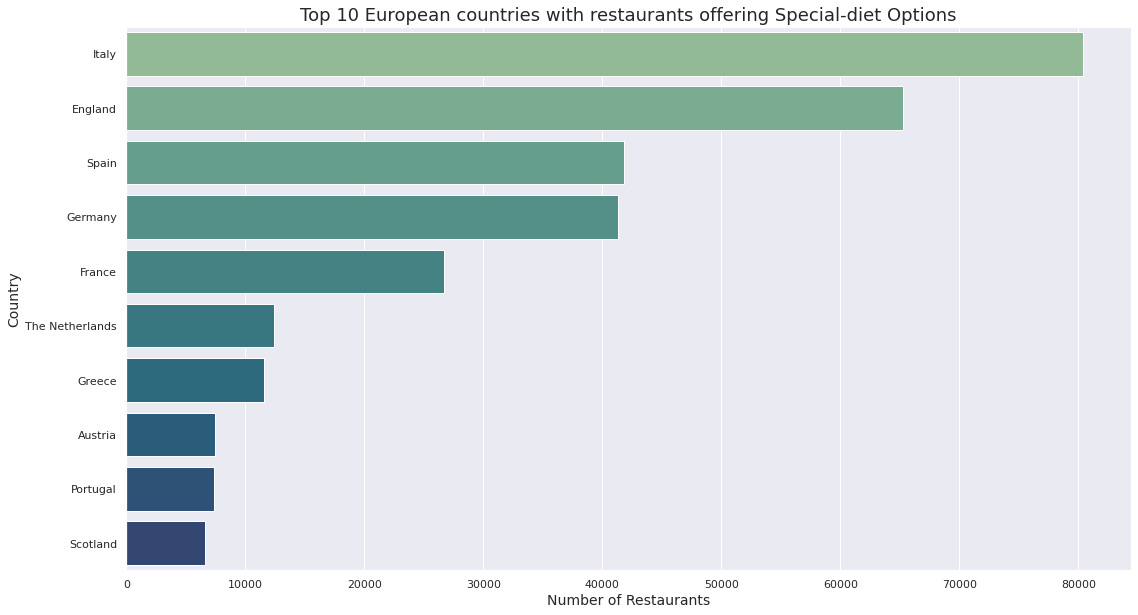

In [ ]:
plt.figure(figsize=(18, 10))
plt.title('Top 10 European countries with restaurants offering Special-diet Options',size=18)
ax = sns.barplot(x=top_10_sd_by_country["Number of special-diet restaurants"], y=top_10_sd_by_country.country, palette='crest')
plt.xlabel('Number of Restaurants', size=14)
plt.ylabel('Country', size=14)
plt.show()

*From the bar chart, we can see that even among the top 10 restaurants, there is a large gap between the number of restaurants offering special-diet meals in the top 5 countries and those ranked 8-10, which also indicates that there is a huge scope for Tripadvisor to promote healthy eating in the European market.*

## 3.2 `price_level`


### 3.2.1 In general, what is the ratio of each price level of European restaurants listed on Tripadvisor?

Of all restaurants in Europe, about 53% are restaurants with medium price levels, and 23% are cheap restaurants. Only less than 3% of the total are expensive restaurants. However, over 21% of restaurants in total do not show the price level on Tripadvisor.

In [ ]:
# Count number of restaurants in each country, and then create a new dataframe.
price_level = df.groupby(['price_level_new']).agg({'restaurant_link': 'count'})\
    .rename(columns={'restaurant_link': 'num_restaurants'}).reset_index().sort_values("num_restaurants", ascending=False)

# Create a new column to calculate the ratio of each price level.  
price_level['ratio'] = price_level.num_restaurants / price_level.num_restaurants.sum()*100

price_level.sort_values(by="ratio", ascending=False)

,price_level_new,num_restaurants,ratio
2,Medium,521268,52.914324
0,Cheap,227858,23.130044
3,Not Listed,209651,21.281838
1,Expensive,26340,2.673794


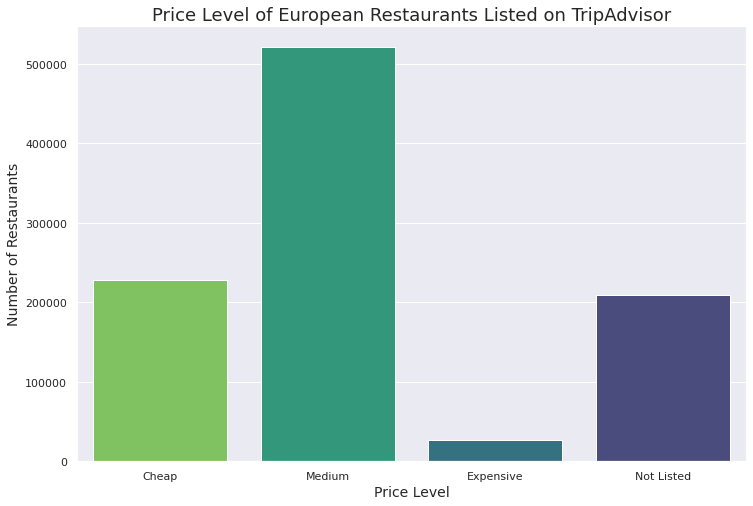

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x=df['price_level_new'], palette='viridis_r', order=['Cheap',"Medium", "Expensive", "Not Listed"])
plt.title("Price Level of European Restaurants Listed on TripAdvisor", fontsize = 18) 
plt.xlabel('Price Level',fontsize = 14)
plt.ylabel('Number of Restaurants',fontsize = 14)
plt.show()

### 3.2.2 Are there any pricing differences between special-diet and non-special-diet restaurants?

Special-diet restaurants are generally priced higher than non-special-diet ones.

For special-diet restaurants, about 74% are priced at the medium level, and about 4% are expensive restaurants. For non-special-diet restaurants, only about 42% are priced at the medium level, and about 2% are expensive restaurants.

From the pie chart, we can also see that the restaurants that do not offer special diets are, in general, the ones that do not indicate the price level. 

In [ ]:
price_df = df[['restaurant_link', 'vegetarian_friendly', 'vegan_options', 'gluten_free', 'price_level_new']]
values1 = special_diets.groupby("price_level_new").restaurant_link.count().reset_index()
values2 = non_special_diets.groupby("price_level_new").restaurant_link.count().reset_index()

print(values1)
print(values2)

  price_level_new  restaurant_link
0           Cheap            71498
1       Expensive            13139
2          Medium           249847
3      Not Listed             3157
  price_level_new  restaurant_link
0           Cheap           156360
1       Expensive            13201
2          Medium           271421
3      Not Listed           206494


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels = ["Cheap", "Medium", "Expensive", "Not Listed"]
colors = ['springgreen','seagreen','limegreen', 'yellow' ]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=values1.price_level_new, values=values1.restaurant_link, name="raio",),
              1, 1)
fig.add_trace(go.Pie(labels=values2.price_level_new, values=values2.restaurant_link, name="ratio"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name",marker=dict(colors=colors))

fig.update_layout(
    title_text="Pricing Differences Between Special-diet Restaurants and Non-special-diet Restaurants", font_size=16, title_x=0.5, 
    # Add annotations in the center of the donut pies.
    annotations=[dict(text="Special-diet Restaurants", x=0.14, y=-0.1, font_size=17, showarrow=False),
                 dict(text="Non-special-diet Restaurants", x=0.90, y=-0.1, font_size=17, showarrow=False)])
fig.show()

A screenshot of the Plotly graph

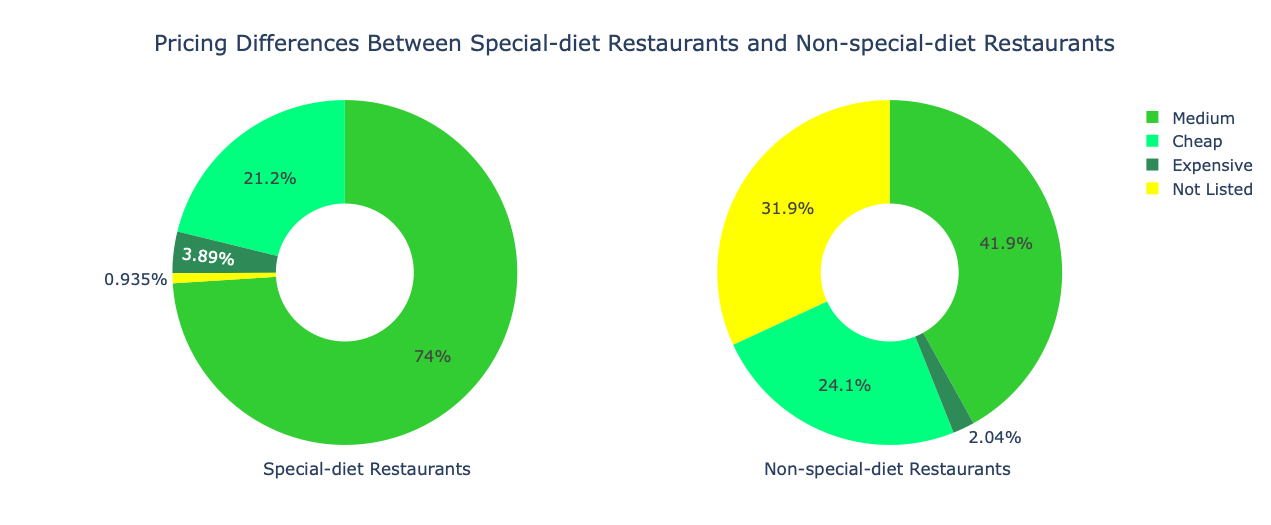

*Based on the above analysis, Tripadvisor should promote healthy eating and encourage more restaurants to offer special diets to increase the revenue of restaurants by increasing the pricing.*

## 3.3  `claimed`

### 3.3.1 How many claimed and unclaimed restaurants are there in Europe?

`claimed` means the restaurant has claimed its business on Tripadvisor. If a business is claimed, the business owner can manage the listing, respond to the reviews and track business performance on Tripadvisor.

There are 462,250 claimed restaurants and 522,867 unclaimed restaurants in Europe.

In [ ]:
claimed = df['claimed'].value_counts().reset_index().rename(columns={'index': " ", "claimed":"count_num"})
claimed["ratio"] = (claimed.count_num / claimed.count_num.sum()* 100).round(2)
claimed

,,count_num,ratio
0,Unclaimed,522867,53.08
1,Claimed,462250,46.92


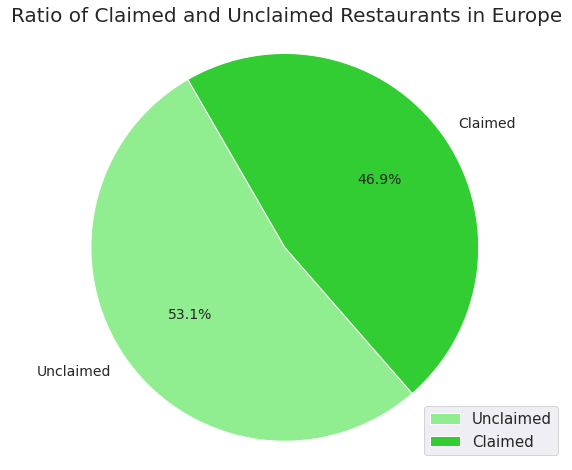

In [ ]:
import matplotlib.pyplot as plotter

plt.rcParams["figure.figsize"] = (10,8)
pieLabels = ['Unclaimed', 'Claimed']
mycolors = ["lightgreen","limegreen"]
ngramPercent = (53.08,46.92)
figureObject, axesObject = plotter.subplots()
axesObject.pie(ngramPercent,
               labels = pieLabels, 
               colors=mycolors,            
               startangle = 120,
               autopct = '%.1f%%',
               textprops={'fontsize': 14})           
axesObject.axis('equal')
plt.title('Ratio of Claimed and Unclaimed Restaurants in Europe',size=20)
plt.legend(fontsize=15)
plotter.show();

### 3.3.2 How many claimed and unclaimed special-diet restaurants in Europe? How about non-special-diet restaurants?

There are 235,792 claimed special-diet restaurants (70%) and 101,849 unclaimed special-diet restaurants (30%) in Europe. However, only 35% of non-special-diet restaurants have claimed their business on Tripadvisor.

The special-diet restaurants have a significantly higher proportion with their business claimed, indicating that these restaurants are more proactive in managing their businesses on Tripadvisor's webpage.



In [ ]:
# Calculate the ratio of claimed/unclaimed in special-diet restaurants
special_diet_claimed = special_diets['claimed'].value_counts().reset_index().rename(columns={'index': " ", "claimed":"count_sd"})
special_diet_claimed["ratio_sd"]= special_diet_claimed.count_sd / special_diet_claimed.count_sd.sum()*100
special_diet_claimed

,,count_sd,ratio_sd
0,Claimed,235792,69.835121
1,Unclaimed,101849,30.164879


In [ ]:
# Calculate the ratio of claimed/unclaimed in non-special-diet restaurants
non_special_diet_claimed = non_special_diets['claimed'].value_counts().reset_index().rename(columns={'index': " ", "claimed":"count_nsd"})
non_special_diet_claimed["ratio_nsd"]= non_special_diet_claimed.count_nsd / non_special_diet_claimed.count_nsd.sum()*100
non_special_diet_claimed

,,count_nsd,ratio_nsd
0,Unclaimed,421018,65.024495
1,Claimed,226458,34.975505


In [ ]:
number_claimed = {'Claimed': [235792, 226458],
        'Unclaimed': [101849, 426458]}
  
claimed_number_table=pd.DataFrame(number_claimed, index=['Special-diet Restaurants',
                               'Non-special-diet Restaurants'])
claimed_number_table

,Claimed,Unclaimed
Special-diet Restaurants,235792,101849
Non-special-diet Restaurants,226458,426458


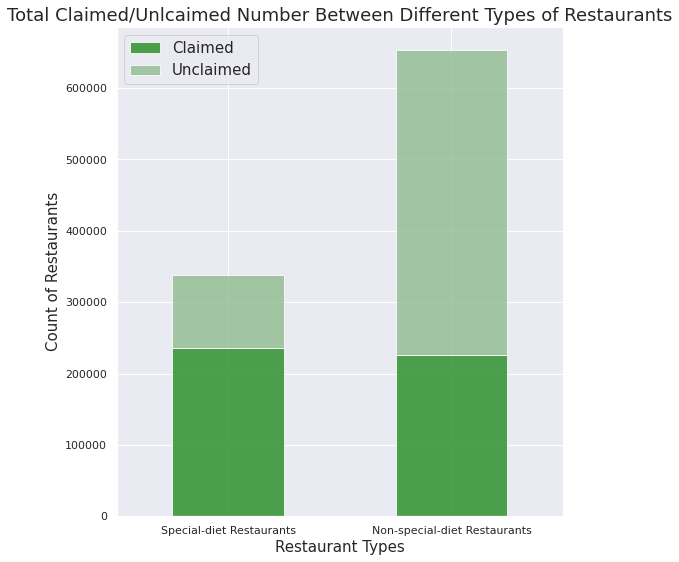

In [71]:
plt.rcParams["figure.figsize"] = (8,9)
claimed_number_table.plot(kind='bar', stacked=True, alpha=0.8, rot=0, color=['forestgreen',  'darkseagreen'])
plt.title('Total Claimed/Unlcaimed Number Between Different Types of Restaurants',size=18)
plt.xlabel('Restaurant Types',size=15)
plt.ylabel('Count of Restaurants',size=15)
plt.legend(fontsize=15);

*Based on this, Tripadvisor can focus on these special-diet restaurants and provide paid services such as ads to promote their business on the webpage. At the same time, Tripadvisor can also engage those restaurants that have not claimed yet to claim because this way can benefit both Tripadvisor and the restaurant owners to gain more customers*.  

### 3.3.3 Are there any differences between special-diet and non-special-diet restaurants in terms of the number of reviews?


There are 184 reviews on average for each claimed restaurant, 281 reviews on average for each special-diet restaurant, and 82 reviews on average for each non-special-diet restaurant.

Although special-diet restaurants are fewer than non-special-diet restaurants, they still have more restaurant reviews for both claimed and unclaimed types, which means special-diet restaurants are more prevalent than non-special-diet restaurants. 

In addition, claimed special-diet restaurants have more reviews than unclaimed special-diet restaurants. It demonstrates that claiming restaurants can behave better because the restaurant owners have the accessibility to customize the web page on Tripadvisor. Since restaurant owners know their businesses better, they would like to show the best part of their business to customers. Therefore, claiming business on Tripadvisor is an effective way to help restaurants to attract more customers.



In [ ]:
# Average number of reviews each restaurants received in general
df.groupby(df['claimed'])['total_reviews_count'].mean().sort_values(ascending = False)

claimed
Claimed      184.066754
Unclaimed     39.848629
Name: total_reviews_count, dtype: float64

In [ ]:
# Average number of reviews each special-diet restaurants received
special_diets_reviews = special_diets.groupby(df['claimed'])['total_reviews_count'].mean().sort_values(ascending = False).reset_index()
special_diets_reviews

,claimed,total_reviews_count
0,Claimed,281.370827
1,Unclaimed,106.169987


In [ ]:
# Average number of reviews each non-special-diet restaurants received
non_special_diets_reviews = non_special_diets.groupby(df['claimed'])['total_reviews_count'].mean().sort_values(ascending = False).reset_index()
non_special_diets_reviews

,claimed,total_reviews_count
0,Claimed,82.752064
1,Unclaimed,23.804745


In [ ]:
# Generate a table to show the differences between special-diet and non-special-diet restaurants
data_claimed = {'Claimed': [281.370827, 82.752064],
        'Unclaimed': [106.169987,23.804745]}
  
table=pd.DataFrame(data_claimed, index=['Special-diet Restaurants',
                               'Non-special-diet Restaurants'])
table
                          

,Claimed,Unclaimed
Special-diet Restaurants,281.370827,106.169987
Non-special-diet Restaurants,82.752064,23.804745


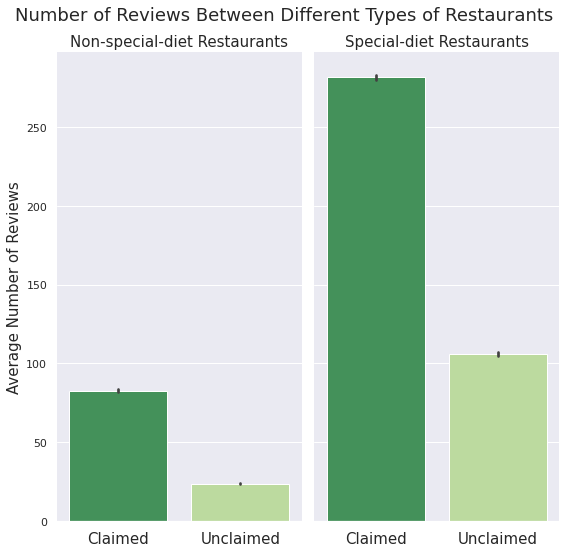

In [ ]:
g = sns.catplot(
    data=df, x ='claimed', y = "total_reviews_count", col="special_diets",
    kind="bar", height=8, aspect=.5, palette="YlGn_r"
)
g.set_axis_labels("", "Average Number of Reviews",size=15)
g.set_xticklabels(["Claimed", "Unclaimed"],size=15)
g.set_titles("{col_name} Restaurants", size=15)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Number of Reviews Between Different Types of Restaurants', fontsize=18)
g.despine(left=True);

## 3.4 `Awards`

### 3.4.1 How does the number of awards relate to the average ratings in all restaurants, special-diet restaurants, and non-special-diet restaurants?



As seen from the table below, for all restaurants, the average rating increases from 3.95 to 4.5 as the number of awards received gradually increases from 0 to 12. 

At the same time, there is a positive trend for all restaurant types between the average rating and the number of awards received per restaurant. The more awards a restaurant gets, the higher the restaurant's average rating. 

In [ ]:
# Calculate the average rating under each number of awards a restaurant received in all restaurants, special-diet restaurants and non-special-diet restaurants
general_awards_rating = df[['number_of_awards','avg_rating']].groupby('number_of_awards').mean().reset_index()
sd_awards_rating  = special_diets[['number_of_awards','avg_rating']].groupby('number_of_awards').mean().reset_index()
nsd_awards_rating  = non_special_diets[['number_of_awards','avg_rating']].groupby('number_of_awards').mean().reset_index()

In [ ]:
# Merge the above three tables together and create a new table
two_awards_rating = general_awards_rating.merge(sd_awards_rating, on="number_of_awards", suffixes=("_general", "_special_diet"))
all_awards_rating = two_awards_rating.merge(nsd_awards_rating, on="number_of_awards").rename(columns={'avg_rating': 'avg_rating_non_special_diet'})
all_awards_rating 

,number_of_awards,avg_rating_general,avg_rating_special_diet,avg_rating_non_special_diet
0,0,3.950033,4.022143,3.932155
1,1,4.088248,4.111851,4.050860
2,2,4.255294,4.266614,4.232766
3,3,4.300744,4.313392,4.262734
4,4,4.304072,4.315901,4.262392
5,5,4.318158,4.325179,4.290984
6,6,4.346052,4.349312,4.332113
7,7,4.370664,4.372869,4.359546
8,8,4.393693,4.394868,4.385971
9,9,4.406753,4.410283,4.376448


*Tripadvisor can hold more awards events to increase consumer activity while providing more restaurants with the opportunity to appear on the list.*

### 3.4.2 What is the relationship between the number of awards and average ratings in different types of restaurants?

Special-diet restaurants always have higher average ratings than non-special-diet restaurants, given a certain number of awards received.

By comparing the graphs, special-diet restaurants always have a higher average rating than non-special-diet restaurants when they have won a certain number of awards. And even a small number of awards (e.g., 2) significantly boosts the rating, from 3.93 to 4.23 for non-special-diet restaurants and from 4.02 to 4.26 for special-diet restaurants.



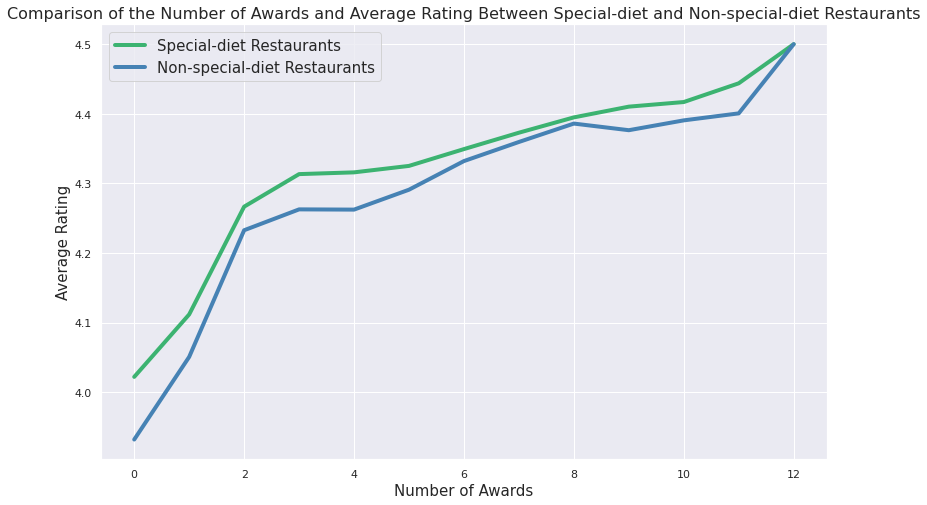

In [80]:
plt.figure(figsize=(13, 8))
sns.lineplot(x="number_of_awards", y="avg_rating", data=sd_awards_rating, label = 'Special-diet Restaurants',color = 'MediumSeaGreen',linewidth = 4)
sns.lineplot(x="number_of_awards", y="avg_rating", data=nsd_awards_rating,label = "Non-special-diet Restaurants",color = 'SteelBlue',linewidth = 4 )
plt.title('Comparison of the Number of Awards and Average Rating Between Special-diet and Non-special-diet Restaurants', size=16)
plt.xlabel('Number of Awards',size=15)
plt.ylabel('Average Rating',size=15)
plt.legend(fontsize=15);

*For restaurants that have yet to win an award, Tripadvisor can encourage them to work towards one, which will get twice the result with half the effort.*

*Tripadvisor can also promote more non-special-diet restaurants to choose to offer special diets, as the gap between them is relatively apparent.*

 ### 3.4.3 How does the number of awards relate to the total number of reviews in all restaurants, special-diet restaurants, and non-special-diet restaurants?


For all types of restaurants, the more awards a restaurant has received, the more reviews it will receive. Although for non-special-diet restaurants, there are some surprises in the change from 11-12 awards, with a drop from 2445 to 1959. However, this may also affect the fact that better restaurants will be relatively more expensive and, therefore, will have fewer customers and reviews. 

Overall, however, awards remain an important indicator as a reference for customers to understand the quality of a restaurant.

In [ ]:
# Calculate the average number of reviews under each number of awards a restaurant received in all restaurants, special-diet restaurants and non-special-diet restaurants
general_awards_reviews = df[['number_of_awards','total_reviews_count']].groupby('number_of_awards').mean().reset_index()
sd_awards_reviews  = special_diets[['number_of_awards','total_reviews_count']].groupby('number_of_awards').mean().reset_index()
nsd_awards_reviews  = non_special_diets[['number_of_awards','total_reviews_count']].groupby('number_of_awards').mean().reset_index()

In [ ]:
# Merge the above three tables together and create a new table
two_awards_reviews= general_awards_reviews.merge(sd_awards_reviews, on="number_of_awards", suffixes=("_general", "_special_diet"))
all_awards_reviews = two_awards_reviews.merge(nsd_awards_reviews, on="number_of_awards").rename(columns={'total_reviews_count': 'total_reviews_count_non_special_diet'})
all_awards_reviews

,number_of_awards,total_reviews_count_general,total_reviews_count_special_diet,total_reviews_count_non_special_diet
0,0,40.929406,102.465077,25.672317
1,1,139.822276,156.089394,114.054747
2,2,167.501205,187.813333,127.077323
3,3,247.918291,267.771485,188.250232
4,4,288.573294,302.980532,237.807272
5,5,317.942570,336.239548,247.123290
6,6,384.240831,395.067740,337.945095
7,7,444.227798,454.793979,390.952451
8,8,543.369600,547.824016,514.069186
9,9,663.882787,656.191276,729.918919


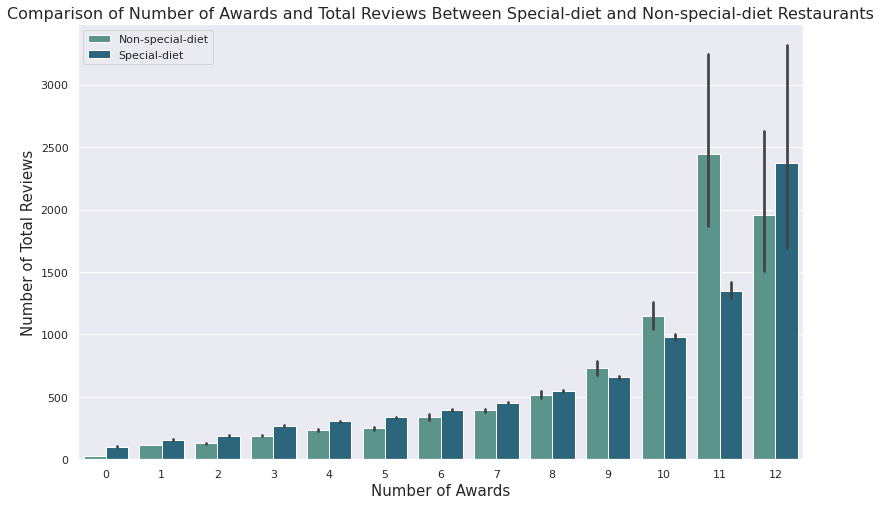

In [79]:
plt.figure(figsize=(13, 8))
sns.barplot(x="number_of_awards", y="total_reviews_count",  hue = 'special_diets', data=df, palette="crest")
plt.xlabel('Number of Awards', size=15)
plt.ylabel('Number of Total Reviews',size=15)
plt.title('Comparison of Number of Awards and Total Reviews Between Special-diet and Non-special-diet Restaurants',size = 16)
plt.legend();

*Tripadvisor could encourage more restaurants to enter competitions to win more awards to maximize consumer appeal and increase the number of reviews.*

*Tripadvisor could also push more restaurants that win more awards because they have a relatively high number of ratings and can provide a better experience to customers on a more consistent basis so that they will use Tripadvisor more in the future.*

## 3.5 `top_tags`

### 3.5.1 What is the relationship between the number of tags a restaurant listed and the number of customer reviews?

The more tags a restaurant lists on Tripadvisor, the higher the number of reviews it will receive, which means it will have more customers. This may be because when users search for keywords, more tags can help users locate the restaurants they want to dine at more precisely, thus attracting them to visit and dine.

In [ ]:
df['number_of_top_tags'].value_counts()

4    469491
2    170845
3    166516
1    104540
0     73725
Name: number_of_top_tags, dtype: int64

In [ ]:
tag_review = df[['number_of_top_tags','total_reviews_count']].groupby('number_of_top_tags').mean()
tag_review

,total_reviews_count
number_of_top_tags,
0,3.684964
1,9.464578
2,32.199807
3,59.412993
4,190.131225


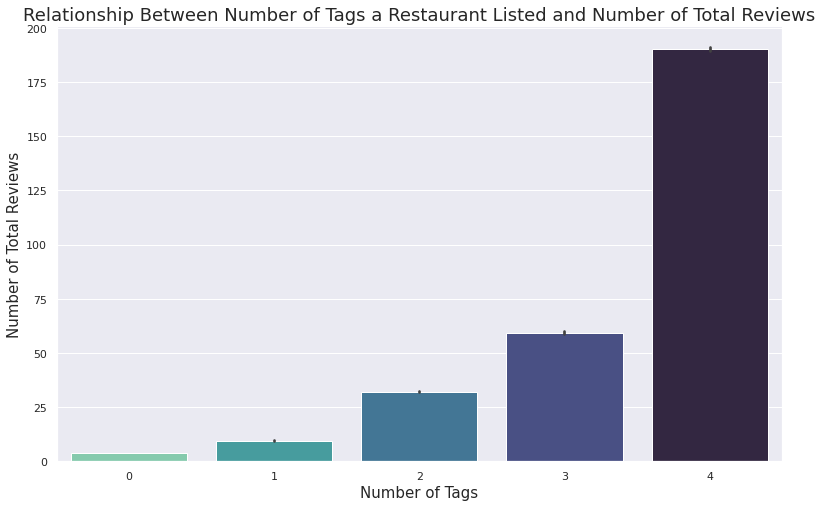

In [77]:
plt.figure(figsize=(13, 8))
sns.barplot(x="number_of_top_tags", y="total_reviews_count", data=df, palette="mako_r")
plt.xlabel('Number of Tags', size=15)
plt.ylabel('Number of Total Reviews',size=15)
plt.title('Relationship Between Number of Tags a Restaurant Listed and Number of Total Reviews',size = 18)
plt.show();

### 3.5.2 What is the relationship between the number of tags a restaurant lists and the average customer rating?

Similar to the number of reviews, the more tags a restaurant lists on Tripadvisor, the higher rating it will receive from customers. The restaurants that use 4 tags receive an overall average rating of 4.12 out of 5. Thus, adding more tags can also help restaurants get better customer reviews.


In [ ]:
tag_rating = df[['number_of_top_tags','avg_rating']].groupby('number_of_top_tags').mean()
tag_rating

,avg_rating
number_of_top_tags,
0,3.900427
1,3.929960
2,3.967965
3,3.977390
4,4.126353


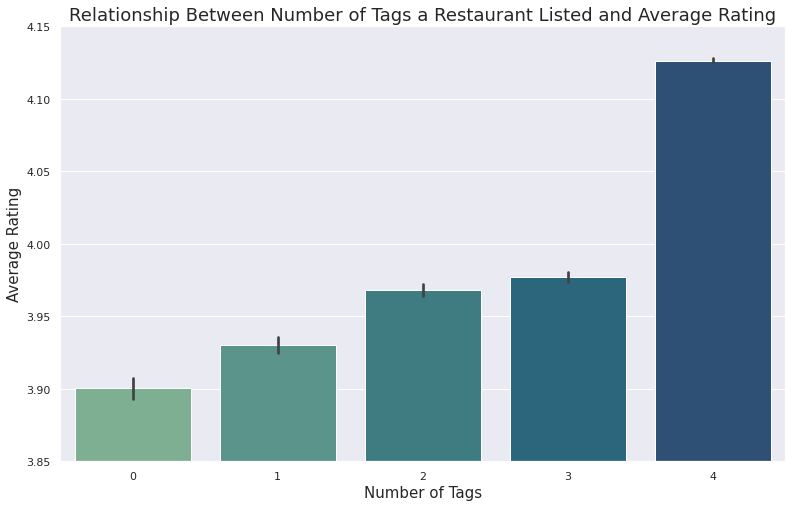

In [78]:
plt.figure(figsize=(13, 8))
sns.barplot(x="number_of_top_tags", y='avg_rating', data=df, palette="crest")
plt.xlabel('Number of Tags', size=15)
plt.ylim(3.85,4.15)
plt.ylabel('Average Rating',size=15)
plt.title('Relationship Between Number of Tags a Restaurant Listed and Average Rating',size = 18)
plt.show()

*Tripadvisor can suggest restaurant owners add more tags to describe their restaurants on their webpage, giving customers more information about their features. At the same time, it will facilitate customers to find restaurants that meet their expectations faster and improve customer experience. They are more likely to give a higher rating after the meals, which also benefits restaurants.*

*Tripadvisor can add some relevant recommended tags or common tags for restaurants when adding tags so that some restaurants without tags can add tags more easily.*

### 3.5.3 How does the number of tags relate to the total number of reviews in special-diet restaurants and non-special-diet restaurants?

For all types of restaurants, the more tags one gets, the more reviews it will receive. We can see that special-diet restaurants have more reviews than non-special-diet restaurants in each number of tags a restaurant lists on Tripadvisor, especially for 4 tags.


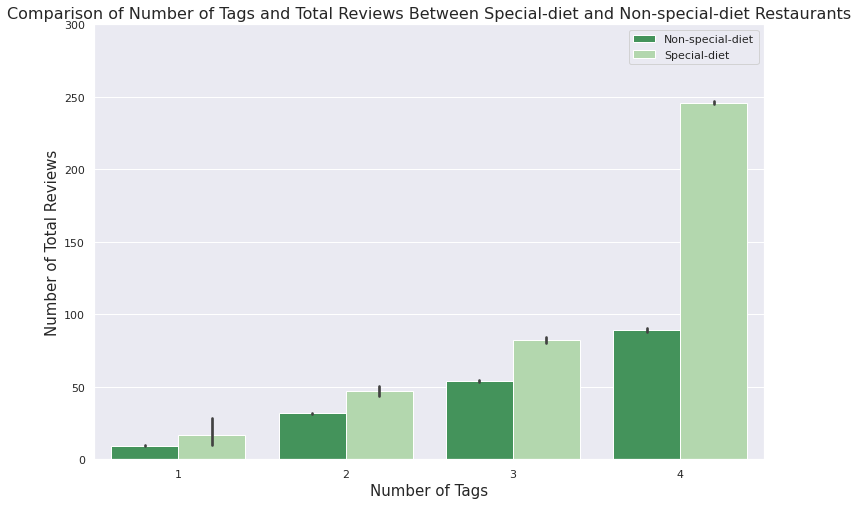

In [73]:
plt.figure(figsize=(12, 8))
sns.barplot(x="number_of_top_tags", y="total_reviews_count",  hue = 'special_diets', data=df, palette="Greens_r")
plt.xlabel('Number of Tags', size=15)
plt.xlim(0.5,4.5)
plt.ylabel('Number of Total Reviews',size=15)
plt.ylim(0,300)
plt.title('Comparison of Number of Tags and Total Reviews Between Special-diet and Non-special-diet Restaurants',size = 16)
plt.legend();

*Tripadvisor can encourage more restaurants to offer special-diet options with more tags to maximize customer attraction and increase the number of reviews.*

## 3.6 `meals`

### 3.6.1 What is the relationship between the number of meal tags and total reviews for special-diet restaurants and non-special-diet restaurants?


From the line plot, we found total reviews count increased when the number of meal tags increased. Moreover, the total reviews for special-diet restaurants are obviously higher than for non-special-diet restaurants for every number of meal tags. This also indicates restaurants that offer special-diet options will have more total reviews.

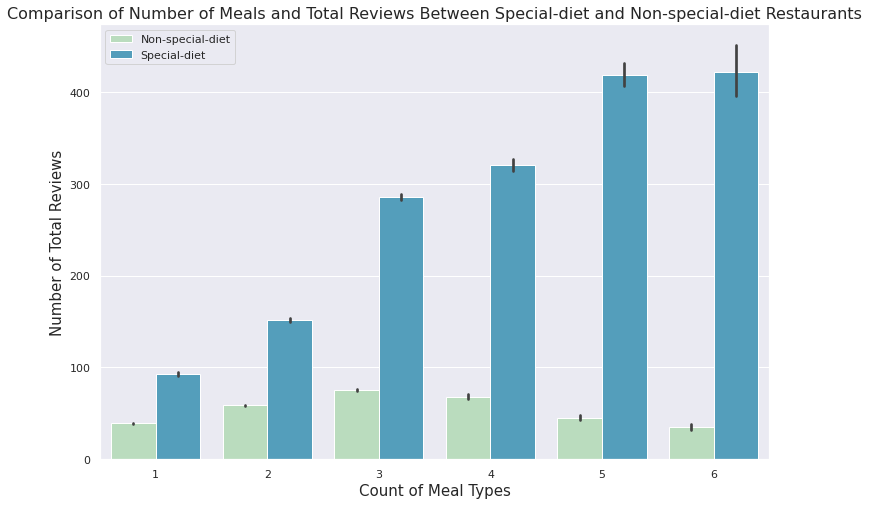

In [72]:
plt.figure(figsize=(12, 8))
sns.barplot(x="number_of_meals", y="total_reviews_count",  hue = 'special_diets', data=df, palette="GnBu")
plt.xlabel('Count of Meal Types', size=15)
plt.xlim(0.5,6.5)
plt.ylabel('Number of Total Reviews',size=15)
plt.title('Comparison of Number of Meals and Total Reviews Between Special-diet and Non-special-diet Restaurants',size = 16)
plt.legend();

*Tripadvisor can ask special-diet restaurants to provide more meal options. For example, brunch and afternoon tea could be some new dining options that contribute to restaurants' popularity.*

# 4.Conclusion

## 4.1 Observations

- Italy, England, and Spain are the top 3 regions with the most restaurants offering special-diet options (Vegan / Vegetarian / Gluten Free) in Europe.
- The special-diet restaurants have a significantly higher proportion with their business claimed, indicating that these restaurants are more proactive in managing their businesses on Tripadvisors' webpage.
- There is a positive trend for all restaurant types between the average rating and the number of awards received per restaurant. The more awards a restaurant gets, the higher the restaurant's average rating. 
- The average total review count for special-diet restaurants is much higher than for non-special-diet restaurants.
- Total reviews increase when the number of meal tags increases. Moreover, the total review counts for special-diet restaurants are higher than for non-special-diets restaurants for every number of meals tag.

## 4.2 Recommendations

- Tripadvisor can adjust the display order on the web page when users browse the restaurants on Tripadvisor. For example, the five countries with the highest number of restaurants could be placed at the top of the page when users browse restaurants in European countries.
- Tripadvisor can start by promoting restaurants that offer special diets in the countries with the most extensive base or the highest percentage. For example, add a "Vegan" or "Gluten-free" logo to the top of these countries' restaurant profile pages.
- Tripadvisor can focus on these special-diet restaurants and provide paid services such as ads to promote their business on the webpage. At the same time, Tripadvisor can also engage those restaurants that have not claimed yet to claim because this way can benefit both Tripadvisor and the restaurant owners to gain more customers.
- Tripadvisor can hold more awards events to increase customer activity while providing more restaurants with the opportunity to appear on the list.
- Tripadvisor can add relevant default tags for restaurants so that some restaurants without tags can add tags more easily.
- Tripadvisor can encourage more restaurants to offer special-diet options with more tags to maximize customer attraction and increase the number of reviews.
- Tripadvisor can ask special-diet restaurants to provide more meal options. For example, brunch and afternoon tea could be some new dining options that contribute to restaurants' popularity.

# 5.Reference

- Tripadvisor website (https://www.tripadvisor.com ) 
- Kaggle link for dataset (https://www.kaggle.com/datasets/stefanoleone992/tripadvisor-european-restaurants)
- Vegan Food Market Size, Share, Trends | Report 2022 to 2030 (https://www.precedenceresearch.com/vegan-food-market)
- Claim Your Free Tripadvisor Listing (https://www.tripadvisor.com/Owners)
- Treemap charts in Python - Plotly (https://plotly.com/python/treemaps/)
- Pie charts in Python - Plotly (https://plotly.com/python/pie-charts/)
- Seaborn: Statistical Data Visualization (https://seaborn.pydata.org)
- Link to cell in Colab (https://stackoverflow.com/questions/64027534/how-to-use-link-to-cell-in-colab)
- CSS color names (https://www.w3.org/wiki/CSS/Properties/color/keywords)

**Link for the Colab notebook**
https://colab.research.google.com/drive/1oidAjyEqy5gabLPFAbK63ZKq9TZ_RCsC?usp=share_link